ANN VS CNN For Image Classification (MNIST Handwritten Digits)

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [14]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
len(X_train)

60000

In [16]:
len(X_test)

10000

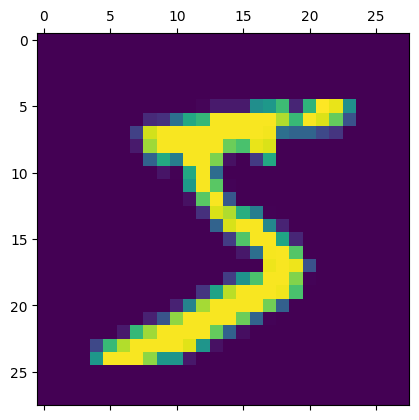

In [17]:
plt.matshow(X_train[0])

In [18]:
#normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [22]:
#convolutional neural network 

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 20s 9ms/step - loss: 0.1388 - accuracy: 0.9567
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0465 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0323 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0178 - accuracy: 0.9942


In [25]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0312 - accuracy: 0.9901


[0.031234310939908028, 0.9901000261306763]

In [26]:
y_predicted = cnn.predict(X_test)
y_predicted[0]

313/313 [==============================] - 1s 4ms/step


array([3.5736211e-10, 1.6069705e-10, 2.3341413e-09, 2.5958657e-08,
       2.8612272e-11, 2.7362986e-13, 3.9704939e-16, 1.0000000e+00,
       1.5843023e-11, 1.1414231e-09], dtype=float32)

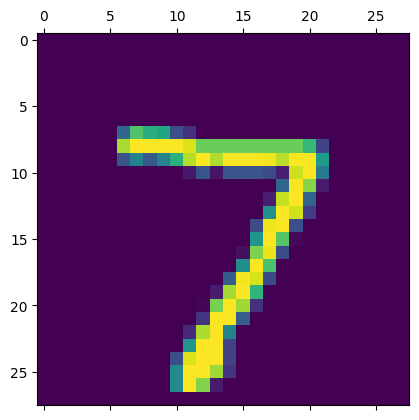

In [27]:
plt.matshow(X_test[0])

In [28]:
np.argmax(y_predicted[0])

7

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    2,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1131,    1,    1,    0,    0,    1,    0,    1,    0],
       [   0,    0, 1026,    1,    0,    0,    0,    4,    1,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  979,    0,    2,    0,    1,    0],
       [   0,    0,    0,    5,    0,  884,    1,    1,    1,    0],
       [   3,    3,    0,    0,    1,    1,  948,    0,    2,    0],
       [   0,    4,    5,    0,    0,    0,    0, 1018,    1,    0],
       [   1,    0,    1,    1,    0,    0,    0,    1,  968,    2],
       [   1,    2,    0,    6,   16,    6,    1,    3,    7,  967]])>

Text(95.72222222222221, 0.5, 'Truth')

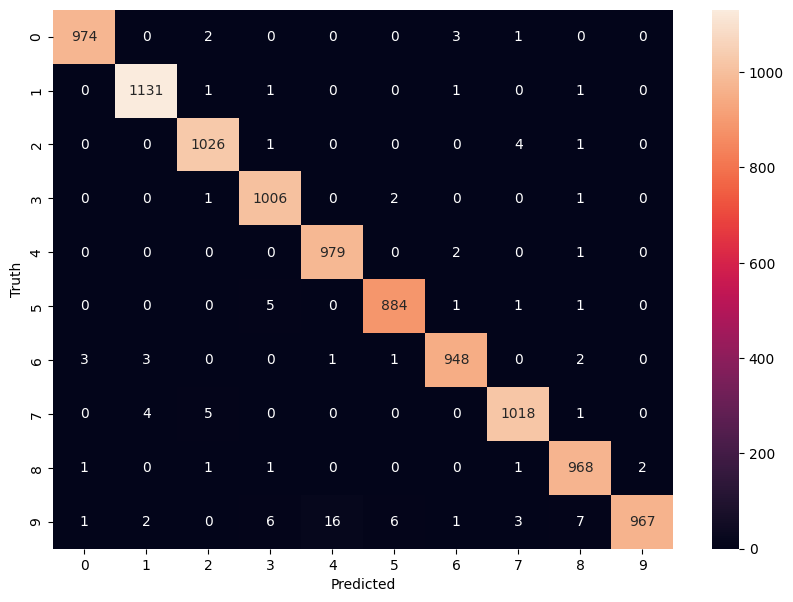

In [32]:
#plotting the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now using Artificial Neural Network (ANN) 

In [36]:
#now using ann
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2695 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1249 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9837


In [38]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9759


[0.07533805817365646, 0.9758999943733215]

In [39]:
y_predicted = ann.predict(X_test)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.3523202e-01, 2.6279673e-04, 8.8596708e-01, 9.8641276e-01,
       7.2591232e-05, 9.8375641e-03, 2.0047847e-07, 9.9999434e-01,
       4.5974541e-01, 6.6749930e-01], dtype=float32)

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

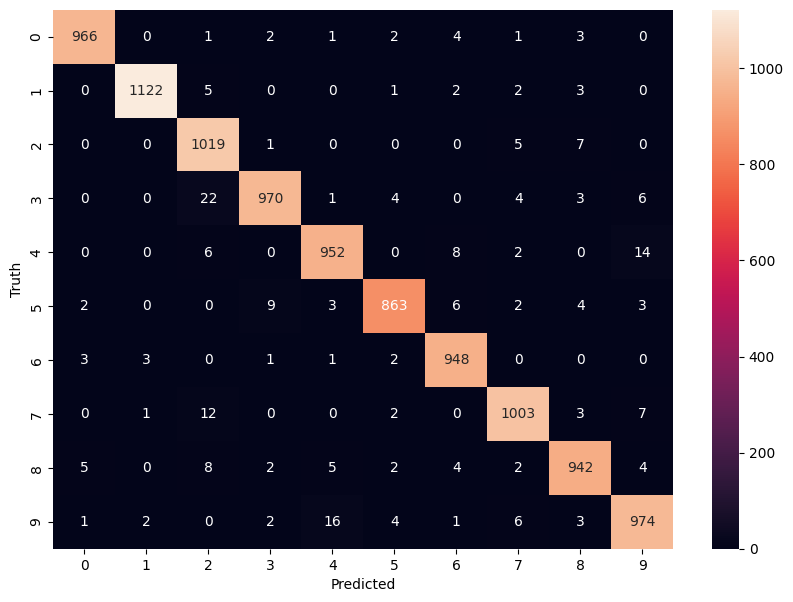

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')